# Emisiones históricas de GEI

In [37]:
import json
import requests
import pandas as pd

## Historical GHG emissions

[Data source](https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=pik&historical-emissions-end_year=2018&historical-emissions-gases=All%20Selected%2Cco2&historical-emissions-regions=ESP&historical-emissions-sectors=All%20Selected&historical-emissions-start_year=1850&page=1)

### Data source PIK (1850-2018)

[data](https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=pik&historical-emissions-end_year=2018&historical-emissions-gases=kyotoghg&historical-emissions-regions=&historical-emissions-sectors=total-excluding-lulucf&historical-emissions-start_year=1850&page=1)

In [76]:
r = requests.get("https://www.climatewatchdata.org/api/v1/data/historical_emissions?source_ids[]=125&end_year=2018&gas_ids[]=358&page=1&per_page=200&regions[]=ESP&sector_ids[]=1448&sort_col=2018&sort_dir=DESC&start_year=1850")

data = r.json().get('data')
df_tmp = pd.DataFrame.from_dict(pd.json_normalize(data))

df_pik =  pd.DataFrame(df_tmp['emissions'].iloc [0])

for colm in list(df_tmp.columns)[:-1]:
    df_pik[colm] = df_tmp[colm].iloc[0]
    
df_pik.head()

,year,value,id,iso_code3,country,data_source,sector,gas,unit
0,1850,8.31,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
1,1851,8.37,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
2,1852,8.45,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
3,1853,8.63,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
4,1854,8.58,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e


Text(0, 0.5, 'Emisiones (MtCO₂e)')

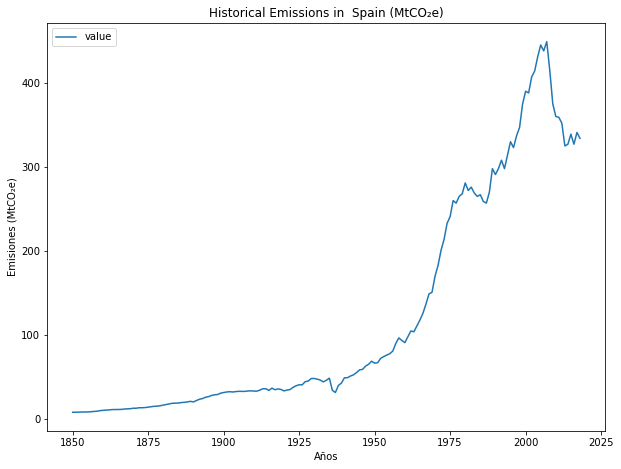

In [74]:
fig, ax = plt.subplots(figsize=(10,7.5))

df_pik.plot(ax = ax, x='year', y='value')

ax.set_title('Historical Emissions in  Spain (MtCO₂e)')
ax.set_xlabel('Años')
ax.set_ylabel('Emisiones (MtCO₂e)')

### Data source CAIT (1990-2018)

[data](https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=cait&historical-emissions-end_year=2018&historical-emissions-gases=all-ghg&historical-emissions-regions=ESP&historical-emissions-sectors=total-excluding-lucf&historical-emissions-start_year=1850&page=1)

In [77]:

r = requests.get("https://www.climatewatchdata.org/api/v1/data/historical_emissions?source_ids[]=124&end_year=2018&gas_ids[]=353&page=1&per_page=200&regions[]=ESP&sector_ids[]=1433&sort_col=2018&sort_dir=DESC&start_year=1850")

data = r.json().get('data')
df_tmp = pd.DataFrame.from_dict(pd.json_normalize(data))

df_cait =  pd.DataFrame(df_tmp['emissions'].iloc [0])

for colm in list(df_tmp.columns)[:-1]:
    df_cait[colm] = df_tmp[colm].iloc[0]

df_cait.head()

,year,value,id,iso_code3,country,data_source,sector,gas,unit
0,1990,275.27,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
1,1991,281.45,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
2,1992,291.28,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
3,1993,276.49,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
4,1994,289.43,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e


In [97]:
df_historic = pd.concat([df_pik[df_pik['year'] < 1990], df_cait])

In [98]:
df_historic

,year,value,id,iso_code3,country,data_source,sector,gas,unit
0,1850,8.31,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
1,1851,8.37,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
2,1852,8.45,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
3,1853,8.63,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
4,1854,8.58,708650,ESP,Spain,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e
...,...,...,...,...,...,...,...,...,...
24,2014,314.95,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
25,2015,325.51,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
26,2016,315.83,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e
27,2017,332.17,700723,ESP,Spain,CAIT,Total excluding LUCF,All GHG,MtCO₂e


**Reorganice data**

In [117]:
df_historic = df_historic[['value', 'year', 'unit']]
df_historic['dataset'] = 'Historical GHG emissions'
df_historic['indicator'] = 'GHG emissions'

df_historic = df_historic[['dataset', 'indicator', 'value', 'year', 'unit']]

df_historic.rename(columns={'value': 'values', 'year': 'years'}, inplace = True)

df_historic

/tmp/ipykernel_109/3823950027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_historic['dataset'] = 'Historical GHG emissions'


,dataset,indicator,values,years,unit
0,Historical GHG emissions,GHG emissions,8.31,1850,MtCO₂e
1,Historical GHG emissions,GHG emissions,8.37,1851,MtCO₂e
2,Historical GHG emissions,GHG emissions,8.45,1852,MtCO₂e
3,Historical GHG emissions,GHG emissions,8.63,1853,MtCO₂e
4,Historical GHG emissions,GHG emissions,8.58,1854,MtCO₂e
...,...,...,...,...,...
24,Historical GHG emissions,GHG emissions,314.95,2014,MtCO₂e
25,Historical GHG emissions,GHG emissions,325.51,2015,MtCO₂e
26,Historical GHG emissions,GHG emissions,315.83,2016,MtCO₂e
27,Historical GHG emissions,GHG emissions,332.17,2017,MtCO₂e


Text(0, 0.5, 'Emisiones (MtCO₂e)')

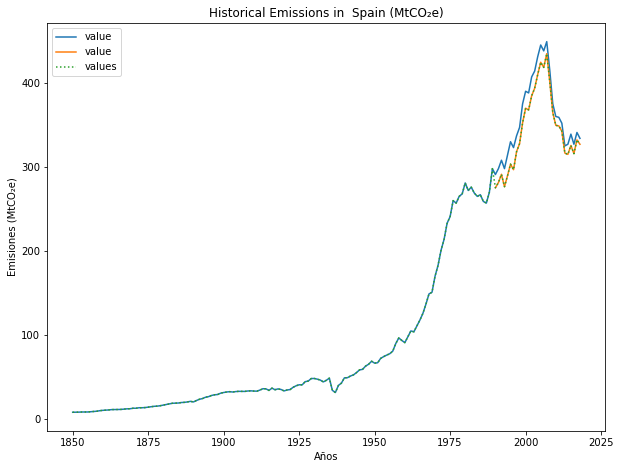

In [118]:
fig, ax = plt.subplots(figsize=(10,7.5))

df_pik.plot(ax = ax, x='year', y='value')
df_cait.plot(ax = ax, x='year', y='value')
df_historic.plot(ax = ax, x='years', y='values',  linestyle=':')

ax.set_title('Historical Emissions in  Spain (MtCO₂e)')
ax.set_xlabel('Años')
ax.set_ylabel('Emisiones (MtCO₂e)')

## Projected GHG emissions

[Data source](https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/sistema-espanol-de-inventario-sei-/Proyecciones.aspx)

En la edición 2021 de las Proyecciones se han estimado las emisiones nacionales de gases de efecto
invernadero (CO2, CH4, N2O, HFC, PFC, SF6 y CO2-equivalente) y los cinco principales contaminantes
atmosféricos: óxidos de nitrógeno (NOx), compuestos orgánicos volátiles no metánicos (COVNM),
óxidos de azufre (SOx), amoniaco (NH3) y material particulado (PM2,5).

Las proyecciones se han construido hasta el horizonte temporal 2040, sobre la base de las emisiones
históricas inventariadas durante el periodo 1990-2019 (último año inventariado). Se han considerado
dos escenarios: uno tendencial, en el que se prevé el impacto de las políticas y regulaciones ya
adoptadas (escenario con medidas existentes: **WeM**) y un segundo escenario en el que se incorpora el
previsible impacto en materia de emisiones de las medidas y políticas previstas en el escenario base
del Plan Nacional Integrado de Energía y Clima, que son coherentes con las contempladas en el
Programa Nacional de Control de la Contaminación Atmosférica, referido a contaminantes atmosféricos
(escenario con medidas adicionales: **WaM**).

In [86]:
WeW = [{'year': 2019, 'value': 314.52851}, {'year': 2020, 'value': 313.92119}, {'year': 2025, 'value': 311.80261}, {'year': 2030, 'value': 298.77812}, {'year': 2035, 'value': 284.83662}, {'year': 2040, 'value': 275.64184}]
WaW = [{'year': 2019, 'value': 314.52851}, {'year': 2020, 'value': 308.02076}, {'year': 2025, 'value': 270.09120}, {'year': 2030, 'value': 223.53546}, {'year': 2035, 'value': 169.70551}, {'year': 2040, 'value': 116.35539}]

df_WeW =  pd.DataFrame(WeW)
df_WaW =  pd.DataFrame(WaW)

**Reorganice data**

In [116]:
df_WeW['scenario'] = 'WeW'
df_WaW['scenario'] = 'WaW'

df_projected = pd.concat([df_WeW, df_WaW])

df_projected['dataset'] = 'Projected GHG emissions'
df_projected['indicator'] = 'GHG emissions'
df_projected['unit'] = df_historic['unit'].iloc[0]

df_projected = df_projected[['dataset', 'indicator', 'scenario', 'value', 'year', 'unit']]

df_projected.rename(columns={'value': 'values', 'year': 'years'}, inplace = True)

df_projected

,dataset,indicator,scenario,values,years,unit
0,Projected GHG emissions,GHG emissions,WeW,314.52851,2019,MtCO₂e
1,Projected GHG emissions,GHG emissions,WeW,313.92119,2020,MtCO₂e
2,Projected GHG emissions,GHG emissions,WeW,311.80261,2025,MtCO₂e
3,Projected GHG emissions,GHG emissions,WeW,298.77812,2030,MtCO₂e
4,Projected GHG emissions,GHG emissions,WeW,284.83662,2035,MtCO₂e
5,Projected GHG emissions,GHG emissions,WeW,275.64184,2040,MtCO₂e
0,Projected GHG emissions,GHG emissions,WaW,314.52851,2019,MtCO₂e
1,Projected GHG emissions,GHG emissions,WaW,308.02076,2020,MtCO₂e
2,Projected GHG emissions,GHG emissions,WaW,270.09120,2025,MtCO₂e
3,Projected GHG emissions,GHG emissions,WaW,223.53546,2030,MtCO₂e


Text(0, 0.5, 'Emisiones (MtCO₂e)')

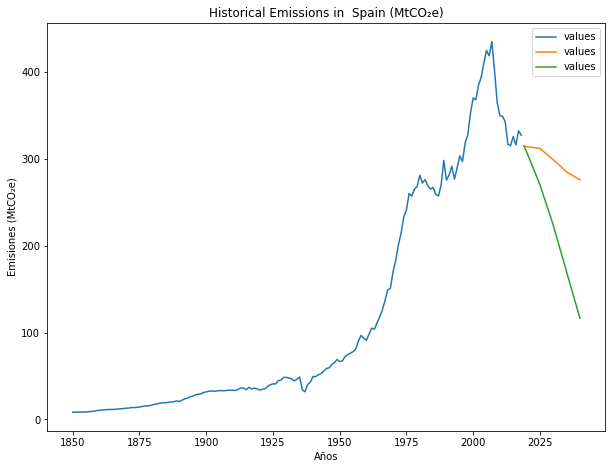

In [120]:
fig, ax = plt.subplots(figsize=(10,7.5))

df_historic.plot(ax = ax, x='years', y='values')
df_projected[df_projected['scenario'] == 'WeW'].plot(ax = ax, x='years', y='values')
df_projected[df_projected['scenario'] == 'WaW'].plot(ax = ax, x='years', y='values')

ax.set_title('Historical Emissions in  Spain (MtCO₂e)')
ax.set_xlabel('Años')
ax.set_ylabel('Emisiones (MtCO₂e)')

**Save tables**

In [121]:
df_historic.to_csv(f'../../datasets/processed/historic_GHG_emissions_spain.csv', index = False)
df_projected.to_csv(f'../../datasets/processed/projected_GHG_emissions_spain.csv', index = False)